In [1]:
import pandas as pd
import numpy as np

import scipy.linalg as la
from numpy import linalg as lnal
import math as m

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
cohort = pd.read_csv('all_ftf_cohorts.csv')
cohort

C:\Users\mboissev\AppData\Local\Temp\ipykernel_18540\3172374980.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  cohort = pd.read_csv('all_ftf_cohorts.csv')


,pid,start,201150,201230,201240,201250,201330,201340,201350,201430,...,201930,201940,201950,202030,202040,202050,202130,202140,202150,202230
0,94308,201150,Freshman,Freshman,Freshman,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,...,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,NaN,NaN
1,252775,201150,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
2,260370,201150,Freshman,Freshman,Freshman,Freshman,Sabbatical,Sabbatical,Sabbatical,Sabbatical,...,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,NaN,NaN
3,305826,201150,Freshman,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
4,316154,201150,Freshman,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17558,1121782,201850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Freshman,Freshman,Freshman,Freshman,Freshman,Sophomore,Sophomore,Sophomore,Sophomore,Dropped Out
17559,1121946,201850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Freshman,Sophomore,Sophomore,Sophomore,Sabbatical,Sabbatical,Sophomore,Sophomore,Sophomore,Junior
17560,1121950,201850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out
17561,1121997,201850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Junior,Junior,Junior,Senior,Senior,Sabbatical,Sabbatical,Senior,Sabbatical,Sabbatical


In [42]:
cohort_states = cohort.iloc[:,2:]
cohort_states.loc[10:15,:]

,201150,201230,201240,201250,201330,201340,201350,201430,201440,201450,...,201930,201940,201950,202030,202040,202050,202130,202140,202150,202230
10,Freshman,Freshman,Freshman,Sophomore,Sophomore,Sophomore,Junior,Junior,Junior,Junior,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
11,Freshman,Freshman,Freshman,Sophomore,Sophomore,Sophomore,Junior,Junior,Senior,Senior,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,NaN,NaN
12,Freshman,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN
13,Freshman,Freshman,Freshman,Freshman,Sophomore,Sophomore,Sophomore,Junior,Junior,Senior,...,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,Graduated,NaN,NaN
14,Freshman,Freshman,Freshman,Freshman,Sophomore,Sophomore,Transferred Out,Transferred Out,Transferred Out,Transferred Out,...,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,Transferred Out,NaN,NaN
15,Freshman,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,...,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,Dropped Out,NaN,NaN


In [13]:
cohort_states = cohort_states.rename(columns={'201150':0, '201230':1, '201240':2, '201250':3, '201330':4, '201340':5, '201350':6,
       '201430':7, '201440':8, '201450':9, '201530':10, '201540':11, '201550':12, '201630':13,
       '201640':14, '201650':15, '201730':16, '201740':17, '201750':18, '201830':19, '201840':20,
       '201850':21, '201930':22, '201940':23, '201950':24, '202030':25, '202040':26, '202050':27,
       '202130':28, '202140':29, '202150':30, '202230':31})

In [14]:
for x in cohort_states.columns:
    print(f'{x}, {cohort_states[cohort_states[x].isnull()].head(1).index.values}, {cohort_states[cohort_states[x].isnull()].tail(1).index.values},{cohort_states.shape[0] - (cohort_states[cohort_states[x].isnull()].tail(1).index.values - cohort_states[cohort_states[x].isnull()].head(1).index.values)}')

0, [2185], [17562],[2186]
1, [2185], [17562],[2186]
2, [2185], [17562],[2186]
3, [4338], [17562],[4339]
4, [4338], [17562],[4339]
5, [4338], [17562],[4339]
6, [6414], [17562],[6415]
7, [6414], [17562],[6415]
8, [6414], [17562],[6415]
9, [8439], [17562],[8440]
10, [8439], [17562],[8440]
11, [8439], [17562],[8440]
12, [10353], [17562],[10354]
13, [10353], [17562],[10354]
14, [10353], [17562],[10354]
15, [12550], [17562],[12551]
16, [12550], [17562],[12551]
17, [12550], [17562],[12551]
18, [15044], [17562],[15045]
19, [15044], [17562],[15045]
20, [15044], [17562],[15045]
21, [], [],[]
22, [], [],[]
23, [], [],[]
24, [], [],[]
25, [], [],[]
26, [], [],[]
27, [], [],[]
28, [], [],[]
29, [], [],[]
30, [0], [2184],[15379]
31, [0], [2184],[15379]


In [15]:
# Create a dictionary of states each state could change into

Graduated = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

Transferred_Out = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

Dropped_Out = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

Sabbatical = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

Freshman = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

Sophomore = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

Junior = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

Senior = {'Graduated' : 0,'Transferred Out' : 0,'Dropped Out' : 0,
     'Sabbatical' : 0,'Freshman' : 0,'Sophomore' : 0,
        'Junior' : 0,'Senior': 0}

In [16]:
# Run through the dataframe and add 1 to every current states next state

for x in range(cohort_states.shape[0]):
    for y in range(cohort_states.shape[1]-1):
        if pd.isnull(cohort_states[y][x]):
            continue
        elif pd.isnull(cohort_states[y+1][x]):
            continue
        elif cohort_states[y][x] == 'Graduated':
            Graduated[cohort_states[y + 1][x]] += 1

        elif cohort_states[y][x] == 'Transferred Out':
            Transferred_Out[cohort_states[y + 1][x]] += 1

        elif cohort_states[y][x] == 'Dropped Out':
            Dropped_Out[cohort_states[y + 1][x]] += 1 

        elif cohort_states[y][x] == 'Sabbatical':
            Sabbatical[cohort_states[y + 1][x]] += 1

        elif cohort_states[y][x] == 'Freshman':
            Freshman[cohort_states[y + 1][x]] += 1

        elif cohort_states[y][x] == 'Sophomore':
            Sophomore[cohort_states[y + 1][x]] += 1

        elif cohort_states[y][x] == 'Junior':
            Junior[cohort_states[y + 1][x]] += 1

        elif cohort_states[y][x] == 'Senior':
            Senior[cohort_states[y + 1][x]] += 1

In [17]:
# Change that value into a probability
Graduated_Prob = []
for x in Graduated.values():
    Graduated_Prob.append(round(x / sum(Graduated.values()),4))

Transferred_Out_Prob = []
for x in Transferred_Out.values():
    Transferred_Out_Prob.append(round(x / sum(Transferred_Out.values()),4))

Dropped_Out_Prob = []
for x in Dropped_Out.values():
    Dropped_Out_Prob.append(round(x / sum(Dropped_Out.values()),4))

Sabbatical_Prob = []
for x in Sabbatical.values():
    Sabbatical_Prob.append(round(x / sum(Sabbatical.values()),4))

Freshman_Prob = []
for x in Freshman.values():
    Freshman_Prob.append(round(x / sum(Freshman.values()),4))

Sophomore_Prob = []
for x in Sophomore.values():
    Sophomore_Prob.append(round(x / sum(Sophomore.values()),4))

Junior_Prob = []
for x in Junior.values():
    Junior_Prob.append(round(x / sum(Junior.values()),4))

Senior_Prob = []
for x in Senior.values():
    Senior_Prob.append(round(x / sum(Senior.values()),4))

In [18]:
Transferred_Out

{'Graduated': 21,
 'Transferred Out': 68019,
 'Dropped Out': 266,
 'Sabbatical': 0,
 'Freshman': 539,
 'Sophomore': 388,
 'Junior': 154,
 'Senior': 67}

In [19]:
rounded_transfer = [round(x,1) for x in Transferred_Out_Prob]

rounded_transfer

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [20]:
# Transition Matrix
tm = np.array([Graduated_Prob,rounded_transfer,Dropped_Out_Prob,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob])
columns = ['Graduated_Prob','Transferred_Out_Prob','Dropped_Out_Prob','Sabbatical_Prob','Freshman_Prob','Sophomore_Prob','Junior_Prob','Senior_Prob']
index = ['Graduated','Transferred_Out','Dropped_Out','Sabbatical','Freshman','Sophmore','Junior','Senior']
# Transtion matrix is in standard form
transition_matrix = pd.DataFrame(tm,columns=columns,index=index)

# Transition Matrix (Assuming Transferred Out is an abosorbtion state along with Graduated and Dropped Out)

# P = [[I O]
#      [A B]]

transition_matrix

,Graduated_Prob,Transferred_Out_Prob,Dropped_Out_Prob,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Graduated,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Transferred_Out,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Dropped_Out,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Sabbatical,0.0033,0.0938,0.0294,0.7749,0.0439,0.0311,0.0157,0.0079
Freshman,0.0000,0.0454,0.0565,0.0923,0.6406,0.1623,0.0027,0.0002
Sophmore,0.0000,0.0286,0.0326,0.0504,0.0000,0.6756,0.2126,0.0003
Junior,0.0127,0.0119,0.0280,0.0296,0.0000,0.0000,0.6751,0.2427
Senior,0.2919,0.0052,0.0430,0.0286,0.0000,0.0000,0.0000,0.6313


Graduated, Transferred_Out and Dropped_Out look to be absorbing states so this transition matrix is said to be an absorbing markov chain

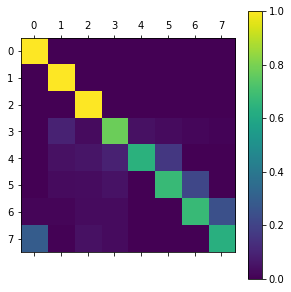

In [21]:
plt.matshow(transition_matrix)
plt.colorbar()
plt.show()

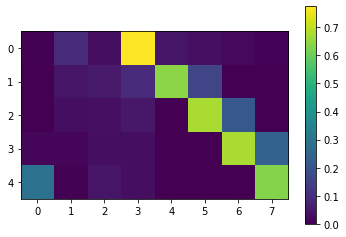

In [22]:
plt.imshow(transition_matrix.tail())
plt.colorbar()
plt.show()

In [23]:
# Check for regularity (some power of transition matrix has all positive enteries) and calculate out intial state 
# and forcast next state (calculate out stationary matrix and find stationary state)

P_bar_pow = lnal.matrix_power(transition_matrix, 100000).round(5)
# P_bar_pow

Matrix does not look to be regular but at a high power it evens out to what I now know is the absorbing probabilities matrix

In [24]:
# I = Matrix that represents the absorbtion states probability of reaching another absorbiton state (Zeros except when it meets itself its a one)
##### This needs to be the same size as B
I = np.identity(5)

I_og = np.array([Graduated_Prob[:3],rounded_transfer[:3],Dropped_Out_Prob[:3]])
I_og

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
# O = is the probability an absorbtion state will reach another state (all Zeros)

O = np.array([Graduated_Prob[3:],rounded_transfer[3:],Dropped_Out_Prob[3:]])
O

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [26]:
# A = is the probability a transient state will meet and absorbtion state

A = np.array([Sabbatical_Prob[:3],Freshman_Prob[:3],Sophomore_Prob[:3],Junior_Prob[:3],Senior_Prob[:3]])
A

array([[0.0033, 0.0938, 0.0294],
       [0.    , 0.0454, 0.0565],
       [0.    , 0.0286, 0.0326],
       [0.0127, 0.0119, 0.028 ],
       [0.2919, 0.0052, 0.043 ]])

In [27]:
# B = r X r identity matrix

B = np.array([Sabbatical_Prob[3:],Freshman_Prob[3:],Sophomore_Prob[3:],Junior_Prob[3:],Senior_Prob[3:]])
B

array([[7.749e-01, 4.390e-02, 3.110e-02, 1.570e-02, 7.900e-03],
       [9.230e-02, 6.406e-01, 1.623e-01, 2.700e-03, 2.000e-04],
       [5.040e-02, 0.000e+00, 6.756e-01, 2.126e-01, 3.000e-04],
       [2.960e-02, 0.000e+00, 0.000e+00, 6.751e-01, 2.427e-01],
       [2.860e-02, 0.000e+00, 0.000e+00, 0.000e+00, 6.313e-01]])

In [28]:
# Calculate the fundamental Matrix F = (I - B)^-1

F = la.inv(I - B)

fun_columns = ['Sabbatical_Prob','Freshman_Prob','Sophomore_Prob','Junior_Prob','Senior_Prob']

fun_index = ['Sabbatical','Freshman','Sophmore','Junior','Senior']

F_df = pd.DataFrame(F,columns = fun_columns, index = fun_index)

F_df

,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Sabbatical,5.052242,0.617121,0.793106,0.768239,0.614932
Freshman,1.880869,3.012160,1.687326,1.220031,0.846403
Sophmore,1.278809,0.156204,3.283363,2.211579,1.485948
Junior,0.753034,0.091982,0.118212,3.192376,2.117690
Senior,0.391902,0.047870,0.061521,0.059592,2.759932


In [29]:
# Average number of trials to go from a non absobing state to an absorbing state

F_steps = np.sum(F,axis=1)

F_steps_df = pd.DataFrame(F_steps,columns={'Average_steps_to_absorbtion'},index=fun_index)
F_steps_df

,Average_steps_to_absorbtion
Sabbatical,7.845641
Freshman,8.646788
Sophmore,8.415903
Junior,6.273294
Senior,3.320817


In [30]:
# Variance on number of visits to a transient state j with starting state i

# F2 = Fundamental Matrix ( 2 * (Diagonal Matrix of Fundamental Matrix) - (Identity Matrix size Fundamental Matrix) ) - (Hadamard product of Fundamental Matrix)

# Make a diagonal Matrix out of the fundamental Matrix
F_diag = np.diag(np.diag(F))

F2 = F * ( ( 2 * F_diag ) - np.identity(5) ) * np.matmul(F,F)

F2_df = pd.DataFrame(F2, columns=fun_columns, index=fun_index)

F2_df

,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Sabbatical,1311.847016,0.00000,0.000000,0.000000,0.000000
Freshman,0.000000,161.17968,0.000000,0.000000,0.000000
Sophmore,0.000000,0.00000,226.845263,0.000000,0.000000
Junior,0.000000,0.00000,0.000000,193.726573,0.000000
Senior,0.000000,0.00000,0.000000,0.000000,101.247604


In [31]:
# Expected number of steps
# F3 = Fundamantal Matrix * Matrix of ones size Fundamental Matrix

F3 = F * np.ones((5,5))

F3_df = pd.DataFrame(F3, columns=fun_columns, index = fun_index)
F3_df

,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Sabbatical,5.052242,0.617121,0.793106,0.768239,0.614932
Freshman,1.880869,3.012160,1.687326,1.220031,0.846403
Sophmore,1.278809,0.156204,3.283363,2.211579,1.485948
Junior,0.753034,0.091982,0.118212,3.192376,2.117690
Senior,0.391902,0.047870,0.061521,0.059592,2.759932


In [32]:
# Variance on number of steps before being absorbed

# F4 = ( 2 * (Fundamental Matrix) - (Identity Matrix size Fundamental Matrix) ) * (Fundamental Matrix) - (Hadmamard Product of Fundamental Matrix))

F4 = ( 2 * F - np.identity(5)) * F - np.multiply(F,F)
F4_df = pd.DataFrame(F4, columns=fun_columns, index = fun_index)
F4_df

,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Sabbatical,20.472911,0.380839,0.629017,0.590191,0.378142
Freshman,3.537668,6.060946,2.847069,1.488475,0.716399
Sophmore,1.635353,0.024400,7.497108,4.891081,2.208042
Junior,0.567061,0.008461,0.013974,6.998887,4.484612
Senior,0.153587,0.002292,0.003785,0.003551,4.857294


In [33]:
# Transient Probabilites The probability of visiting transient state j when starting at a transient state i

# F5 = ((Fundamental Matrix) - (Identity Matrix size Fundamental))(Diagonal Matrix of Fundamental Matrix) ^ -1

F5 = ( F - np.identity(5) ) * lnal.inv(F_diag)
F5_df = pd.DataFrame(F5, columns=fun_columns, index=fun_index)
F5_df

,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Sabbatical,0.802068,0.000000,0.000000,0.000000,0.000000
Freshman,0.000000,0.668012,0.000000,0.000000,0.000000
Sophmore,0.000000,0.000000,0.695434,0.000000,0.000000
Junior,0.000000,0.000000,0.000000,0.686754,0.000000
Senior,0.000000,0.000000,0.000000,0.000000,0.637672


In [34]:
# Find the limiting matrix or probability of ending states

# P_bar = [[I 0]
#          [FA 0]]

FA = F@A

I_O = np.concatenate( [I_og, np.zeros((3,5))],axis=1)

FA_O = np.concatenate( [ FA , np.zeros( (5,5) ) ],axis=1 )

P_bar = np.concatenate([I_O, FA_O])

P_bar_df = pd.DataFrame(P_bar.round(4), columns=columns,index=index)

P_bar_df

,Graduated_Prob,Transferred_Out_Prob,Dropped_Out_Prob,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Graduated,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
Transferred_Out,0.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0
Dropped_Out,0.0000,0.0000,1.0000,0.0,0.0,0.0,0.0,0.0
Sabbatical,0.2059,0.5369,0.2572,0.0,0.0,0.0,0.0,0.0
Freshman,0.2688,0.3804,0.3510,0.0,0.0,0.0,0.0,0.0
Sophmore,0.4661,0.2550,0.2793,0.0,0.0,0.0,0.0,0.0
Junior,0.6612,0.1272,0.2116,0.0,0.0,0.0,0.0,0.0
Senior,0.8077,0.0558,0.1366,0.0,0.0,0.0,0.0,0.0


In [35]:
# Absorbing Probabilities found using a high power of the transition matrix to find the limiting matrix

P_bar_power = pd.DataFrame(lnal.matrix_power(transition_matrix, 100).round(4), columns = columns , index = index)
P_bar_power

,Graduated_Prob,Transferred_Out_Prob,Dropped_Out_Prob,Sabbatical_Prob,Freshman_Prob,Sophomore_Prob,Junior_Prob,Senior_Prob
Graduated,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
Transferred_Out,0.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0
Dropped_Out,0.0000,0.0000,1.0000,0.0,0.0,0.0,0.0,0.0
Sabbatical,0.2059,0.5369,0.2572,0.0,0.0,0.0,0.0,0.0
Freshman,0.2688,0.3804,0.3510,0.0,0.0,0.0,0.0,0.0
Sophmore,0.4661,0.2550,0.2793,0.0,0.0,0.0,0.0,0.0
Junior,0.6612,0.1272,0.2116,0.0,0.0,0.0,0.0,0.0
Senior,0.8077,0.0558,0.1366,0.0,0.0,0.0,0.0,0.0
